<a href="https://colab.research.google.com/github/jorge-pichardo07/EDP1/blob/main/Tarea__Conorno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt



In [9]:
# Nombramos los alpha como a_i
x, a0, a1, a2, a3 = sp.symbols('x a0 a1 a2 a3')

In [10]:
# Forma de la solución aproximada
u_N = a0 + a1*x + a2*x**2 + a3*x**3

In [11]:
# Aplicar condiciones iniciales:
# u(0) = 0
cond1 = sp.Eq(u_N.subs(x, 0), 0)
# u'(0) = 2
u_N_prime = sp.diff(u_N, x)
cond2 = sp.Eq(u_N_prime.subs(x, 0), 2)

In [12]:
# Resolver para alpha0 y alpha1
sol_alpha = sp.solve([cond1, cond2], [a0, a1])
print("Parte (i): Valores de α0 y α1 que satisfacen condiciones iniciales:")
print(f"α0 = {sol_alpha[a0]}")
print(f"α1 = {sol_alpha[a1]}\n")

Parte (i): Valores de α0 y α1 que satisfacen condiciones iniciales:
α0 = 0
α1 = 2



In [13]:

# Sustituir en u_N
u_N_subs = u_N.subs(sol_alpha)

In [14]:
# Calcular el error
u_N_double_prime = sp.diff(u_N_subs, x, 2)
epsilon = sp.simplify(u_N_double_prime + u_N_subs - x)
print(f"E = u_N'' + u_N - x =")
print(f"{"E"}\n")

E = u_N'' + u_N - x =
E



In [15]:

# Hacemos que E sea cero en los puntos de colocación
col_points = [sp.Rational(1, 2), 1]  # x = 1/2 y x = 1

eq1 = sp.Eq(epsilon.subs(x, col_points[0]), 0)
eq2 = sp.Eq(epsilon.subs(x, col_points[1]), 0)

sol_coeffs = sp.solve([eq1, eq2], [a2, a3])
print("Coeficientes α2 y α3 por colocación:")
print(f"α2 = {sol_coeffs[a2]}")
print(f"α3 = {sol_coeffs[a3]}\n")

Coeficientes α2 y α3 por colocación:
α2 = -1/17
α3 = -2/17



In [16]:

# Solución aproximada final
u_approx_final = u_N_subs.subs(sol_coeffs)
print("Solución aproximada u_N(x) =")
print(sp.simplify(u_approx_final))

Solución aproximada u_N(x) =
x*(-2*x**2 - x + 34)/17


In [17]:
# Resolver la EDO exactamente
u = sp.Function('u')
ode_exact = sp.Eq(u(x).diff(x, 2) + u(x), x)
sol_exact = sp.dsolve(ode_exact, ics={u(0): 0, sp.diff(u(x), x).subs(x, 0): 2})
print("\nSolución exacta:")
print(sol_exact.rhs)



Solución exacta:
x + sin(x)


In [18]:
# Convertir a funciones numéricas
u_approx_func = sp.lambdify(x, u_approx_final, "numpy")
u_exact_func = sp.lambdify(x, sol_exact.rhs, "numpy")

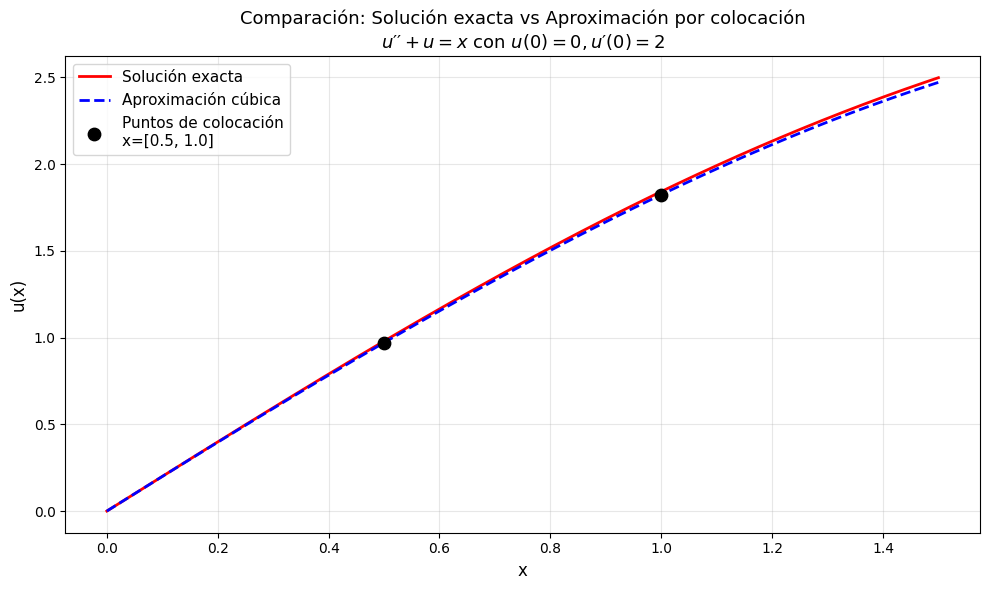


Ecuación E después de sustituir α0 y α1:
E = a2*x**2 + 2*a2 + a3*x**3 + 6*a3*x + x

Ecuación E después de sustituir todos los coeficientes:
E_final = -2*x**3/17 - x**2/17 + 5*x/17 - 2/17

Verificación: E en puntos de colocación (debe ser ≈ 0):
E(1/2) = 0 ≈ 0.00e+00
E(1) = 0 ≈ 0.00e+00


In [23]:
# Graficamos
x_vals = np.linspace(0, 1.5, 200)
u_approx_vals = u_approx_func(x_vals)
u_exact_vals = u_exact_func(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, u_exact_vals, 'r-', label='Solución exacta', linewidth=2)
plt.plot(x_vals, u_approx_vals, 'b--', label='Aproximación cúbica', linewidth=2)

# Marcar puntos de colocación
col_x_vals = [0.5, 1.0]
col_y_vals = u_approx_func(np.array(col_x_vals))
plt.scatter(col_x_vals, col_y_vals, color='black', s=80, zorder=5,
           label=f'Puntos de colocación\nx={col_x_vals}')

plt.xlabel('x', fontsize=12)
plt.ylabel('u(x)', fontsize=12)
plt.title('Comparación: Solución exacta vs Aproximación por colocación\n$u′′ + u = x$ con $u(0)=0, u′(0)=2$', fontsize=13)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

#  Mostrar ecuación de E simplificada
print(f"\nEcuación E después de sustituir α0 y α1:")
print(f"E = {epsilon}")
print(f"\nEcuación E después de sustituir todos los coeficientes:")
epsilon_final = sp.simplify(sp.diff(u_approx_final, x, 2) + u_approx_final - x)
print(f"E_final = {epsilon_final}")

#  Calcular error en puntos de colocación
print("\nVerificación: E en puntos de colocación (debe ser ≈ 0):")
for point in col_points:
    eps_val = epsilon_final.subs(x, point)
    print(f"E({point}) = {eps_val} ≈ {float(eps_val):.2e}")